In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['car_evaluation.csv']))

In [4]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:

    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [9]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [10]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [11]:
X = df.drop(['class'], axis=1)

y = df['class']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state= 4)

## Now Feature Engineering

In [13]:
!pip install -q -U dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.6 MB/s eta 0:00:00


In [14]:
!pip install category-encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [15]:
# import category encoders

import category_encoders as ce

In [57]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [58]:
X_train.sample(5)

,buying,maint,doors,persons,lug_boot,safety
275,3,1,2,1,3,1
1277,1,4,1,3,1,1
856,4,4,1,2,1,2
75,3,2,2,2,2,3
1032,1,3,2,1,3,3


# ID3 with entropy

In [59]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion= 'entropy' , max_depth= 3)

In [60]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [61]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [62]:
from sklearn.metrics import accuracy_score
print(" Test score accuracy of model is:",accuracy_score(y_test,y_pred))
print(" training set score accuracy of model is:",accuracy_score(y_train,y_pred_train))

 Test score accuracy of model is: 0.7947976878612717
 training set score accuracy of model is: 0.7907313540912382


[Text(0.3333333333333333, 0.875, 'x[3] <= 1.5\nentropy = 1.21\nsamples = 1381\nvalue = [303, 54, 968, 56]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 457\nvalue = [0, 0, 457, 0]'),
 Text(0.5, 0.625, 'x[5] <= 1.5\nentropy = 1.485\nsamples = 924\nvalue = [303, 54, 511, 56]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 302\nvalue = [0, 0, 302, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\nentropy = 1.653\nsamples = 622\nvalue = [303, 54, 209, 56]'),
 Text(0.5, 0.125, 'entropy = 1.748\nsamples = 314\nvalue = [164, 54, 40, 56]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.993\nsamples = 308\nvalue = [139, 0, 169, 0]')]

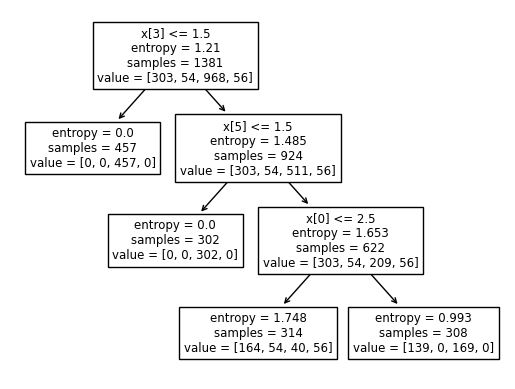

In [63]:
from sklearn import tree

tree.plot_tree(clf.fit(X_train,y_train))

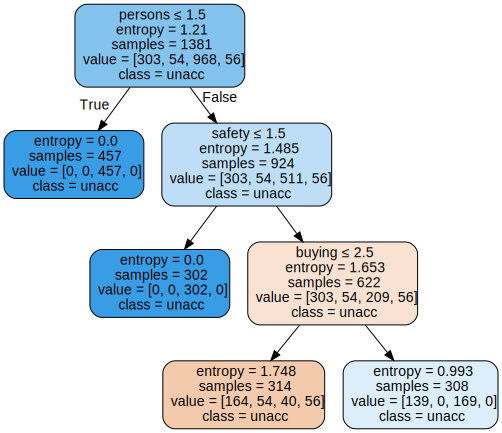

In [64]:
import graphviz

dot_data = tree.export_graphviz(clf ,out_file = None ,
                                feature_names = X_train.columns,
                                class_names = y_train,
                                filled = True , rounded = True , special_characters= True)

graph = graphviz.Source(dot_data)

graph

## D tree vizualization

In [40]:
import dtreeviz

In [65]:
viz_cmodel = dtreeviz.model(clf,
                           tree_index=3,
                           X_train = X_train,
                           y_train = y_train,
                           feature_names= X_train.columns,
                           target_name= " category",
                           class_names= ['unacc', 'acc', 'vgood', 'good'])

In [67]:
# viz_cmodel.view(scale = 1.5)

In [ ]:
y_train.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [ ]:
# confudiom matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[ 40   0  41   0]
 [ 15   0   0   0]
 [  6   0 235   0]
 [  9   0   0   0]]


In [ ]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.57      0.49      0.53        81
        good       0.00      0.00      0.00        15
       unacc       0.85      0.98      0.91       241
       vgood       0.00      0.00      0.00         9

    accuracy                           0.79       346
   macro avg       0.36      0.37      0.36       346
weighted avg       0.73      0.79      0.76       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
